In [1]:
import pandas as pd
import acquire as a
import prepare as p
import explore_functions as e

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_json('repos.json')

In [3]:
df.head()

,repo,language,readme_contents
0,justinmk/vim-sneak,Vim Script,sneak.vim 👟\n================\n\nJump to any l...
1,google-research-datasets/Objectron,Jupyter Notebook,"\n<div align=""center"">\n\n# Objectron Dataset\..."
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
3,shoes/shoes-deprecated,C,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...


In [4]:
df['language'].dropna()

0            Vim Script
1      Jupyter Notebook
2                  Ruby
3                     C
4            JavaScript
             ...       
191                Dart
194          TypeScript
195          JavaScript
196                  C#
197                HTML
Name: language, Length: 185, dtype: object

In [5]:
others = ['TypeScript', 'Jupyter Notebook', 'Java', 'C#', 'Swift', 'CSS', 'C', 'C++', 'Kotlin',
         'VimL', 'Handlebars', 'Vue', 'Go', 'SCSS', 'Emacs Lisp', 'Vim Script', 'Lua', 'TeX',
         'Rust', 'Shell', 'PHP', 'Vim script', 'CoffeeScript']

In [6]:
df = df.replace(to_replace=others, value="Other")

def prep_article_data(df, column, exclude_words=[]):

    df['clean'] = df[column].apply(p.basic_clean)\
                            .apply(p.tokenize)\
                            .apply(p.remove_stopwords,
                                  exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(p.stem)
    
    df['lemmatized'] = df['clean'].apply(p.lemmatize)
    
    return df[['repo', column,'clean', 'stemmed', 'lemmatized']]

In [7]:
p.prep_article_data(df, 'readme_contents', exclude_words = ['slammer'])

,repo,readme_contents,clean,stemmed,lemmatized
0,justinmk/vim-sneak,sneak.vim 👟\n================\n\nJump to any l...,sneakvim jump location specified two character...,sneakvim jump locat specifi two charact sneak ...,sneakvim jump location specified two character...
1,google-research-datasets/Objectron,"\n<div align=""center"">\n\n# Objectron Dataset\...",div aligncenter objectron dataset objectron da...,div aligncent objectron dataset objectron data...,div aligncenter objectron dataset objectron da...
2,shoes/shoes4,# Shoes 4 [![Linux Build Status](https://secur...,shoes 4 linux build statushttpssecuretraviscio...,shoe 4 linux build statushttpssecuretraviscior...,shoe 4 linux build statushttpssecuretraviscior...
3,shoes/shoes-deprecated,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...,repo longer active looking continuing shoes 3 ...,repo longer activ look continu shoe 3 support ...,repo longer active looking continuing shoe 3 s...
4,filamentgroup/shoestring,:warning: This project is archived and the rep...,warning project archived repository longer mai...,warn project archiv repositori longer maintain...,warning project archived repository longer mai...
...,...,...,...,...,...
193,alexyoung/snake-shoes,h2. Snake in Shoes\n\nThis is a simple Snake g...,h2 snake shoes simple snake game written ruby ...,h2 snake shoe simpl snake game written rubi sh...,h2 snake shoe simple snake game written ruby s...
194,kaushiksheel/ShoesStore-Frontend-Typescript,# Shoe Store Ecommerce Application\n\n## Intro...,shoe store ecommerce application introduction ...,shoe store ecommerc applic introduct ecommerc ...,shoe store ecommerce application introduction ...
195,devyn/shoes-web,== Welcome to Radiant\n\nRadiant is a no-fluff...,welcome radiant radiant nofluff open source co...,welcom radiant radiant nofluff open sourc cont...,welcome radiant radiant nofluff open source co...
196,mjokic/adidas_carter,# adidas_carter\n\nAdidas carter helps you car...,adidas_carter adidas carter helps cart shoes a...,adidas_cart adida carter help cart shoe adida ...,adidas_carter adidas carter help cart shoe adi...


In [8]:
df = df.drop([29, 139])

In [9]:
other_words = p.clean_text(' '.join(df[df['language'] == 'Other']['readme_contents']))
javascript_words = p.clean_text(' '.join(df[df['language'] == 'JavaScript']['readme_contents']))
html_words = p.clean_text(' '.join(df[df['language'] == 'HTML']['readme_contents']))
dart_words = p.clean_text(' '.join(df[df['language'] == 'Dart']['readme_contents']))
ruby_words = p.clean_text(' '.join(df[df['language'] == 'Ruby']['readme_contents']))
python_words = p.clean_text(' '.join(df[df['language'] == 'Python']['readme_contents']))
all_words = p.clean_text(' '.join(df['readme_contents']))

In [10]:
other_counts = pd.Series(other_words).value_counts()
javascript_counts = pd.Series(javascript_words).value_counts()
html_counts = pd.Series(html_words).value_counts()
dart_counts = pd.Series(dart_words).value_counts()
ruby_counts = pd.Series(ruby_words).value_counts()
python_counts = pd.Series(python_words).value_counts()
all_counts = pd.Series(all_words).value_counts()

In [11]:
word_freq = pd.concat([other_counts, javascript_counts, html_counts, dart_counts, 
                       ruby_counts, python_counts, all_counts], axis=1)
word_freq.head()

,0,1,2,3,4,5,6
run,55.0,45.0,8.0,9.0,53.0,26.0,201
img,38.0,32.0,7.0,15.0,2.0,7.0,101
project,37.0,66.0,35.0,22.0,27.0,15.0,208
file,36.0,42.0,65.0,NaN,53.0,28.0,237
use,36.0,54.0,19.0,3.0,49.0,39.0,203


In [12]:
word_freq.columns = ['other', 'javascript', 'html', 'dart', 'ruby', 'python', 'all']
word_freq.fillna(0, inplace=True)
word_freq.head()

,other,javascript,html,dart,ruby,python,all
run,55.0,45.0,8.0,9.0,53.0,26.0,201
img,38.0,32.0,7.0,15.0,2.0,7.0,101
project,37.0,66.0,35.0,22.0,27.0,15.0,208
file,36.0,42.0,65.0,0.0,53.0,28.0,237
use,36.0,54.0,19.0,3.0,49.0,39.0,203


In [13]:
word_freq.dtypes

other         float64
javascript    float64
html          float64
dart          float64
ruby          float64
python        float64
all             int64
dtype: object

In [14]:
word_freq = word_freq.astype('int')
word_freq.head()

,other,javascript,html,dart,ruby,python,all
run,55,45,8,9,53,26,201
img,38,32,7,15,2,7,101
project,37,66,35,22,27,15,208
file,36,42,65,0,53,28,237
use,36,54,19,3,49,39,203


In [15]:
word_freq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9052 entries, run to pandasdataframedata
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   other       9052 non-null   int64
 1   javascript  9052 non-null   int64
 2   html        9052 non-null   int64
 3   dart        9052 non-null   int64
 4   ruby        9052 non-null   int64
 5   python      9052 non-null   int64
 6   all         9052 non-null   int64
dtypes: int64(7)
memory usage: 565.8+ KB


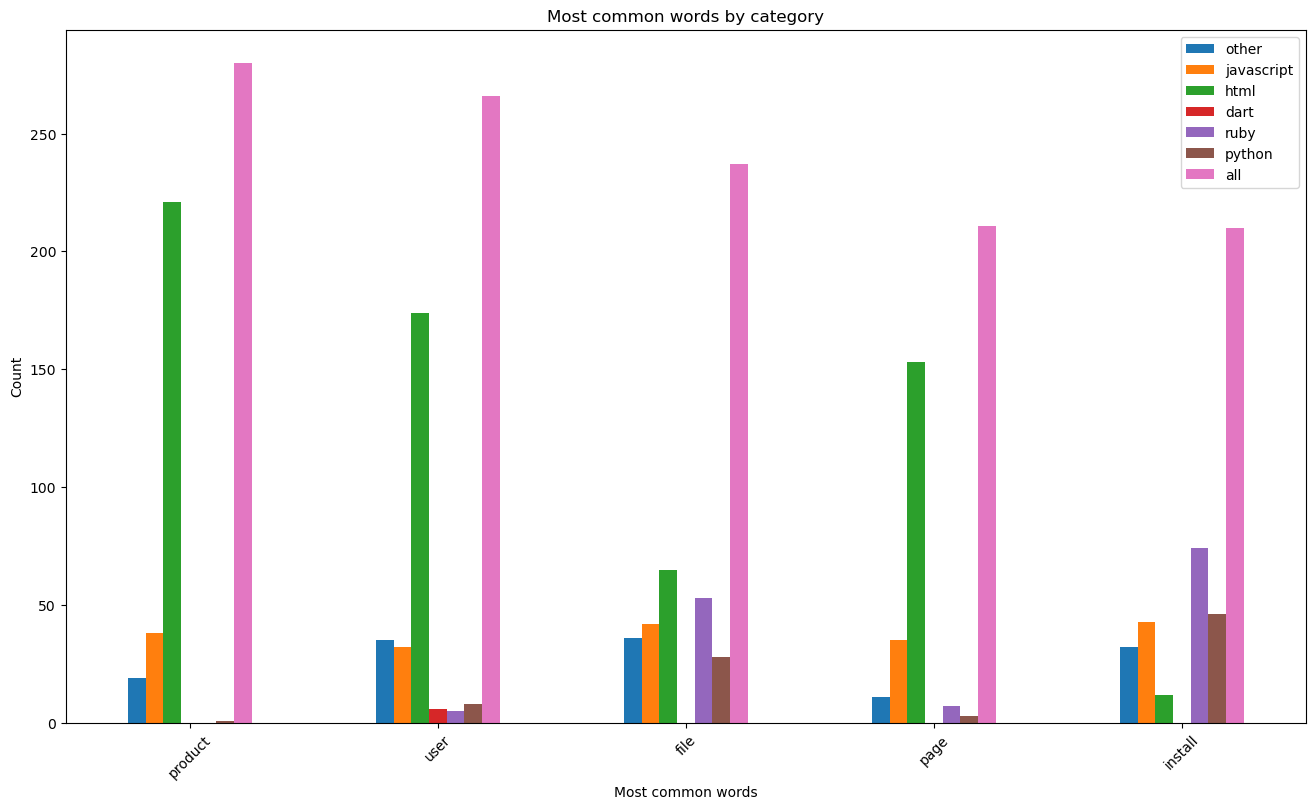

In [16]:
e.word_count(word_freq)

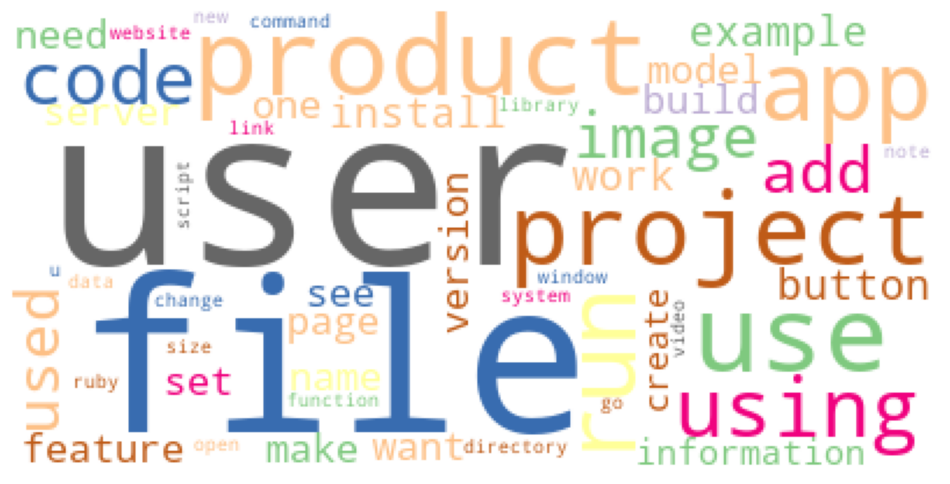

In [17]:
all_cloud = WordCloud(max_words = 50, background_color='white', colormap = 'Accent').generate(' '.join(all_words))
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud)
plt.axis('off')
plt.show()

In [18]:
def shoe_cloud():
    shoe_mask2 = np.array(Image.open("shoe_mask2.png"))
    
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    
    transformed_shoe_mask = np.ndarray((shoe_mask2.shape[0],shoe_mask2.shape[1]), np.int32)

    for i in range(len(shoe_mask2)):
        transformed_shoe_mask[i] = list(map(transform_format, shoe_mask2[i]))
        
    wc = WordCloud(background_color="white", max_words=150, mask=transformed_shoe_mask, contour_width=.5, contour_color='black')

    # Generate a wordcloud
    wc.generate(' '.join(all_words))

    # store to file
    wc.to_file("shoe_mask.png")

    # show
    plt.figure(figsize=[12,8])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()



In [19]:
python_mask = np.array(Image.open("python_mask.png"))
python_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

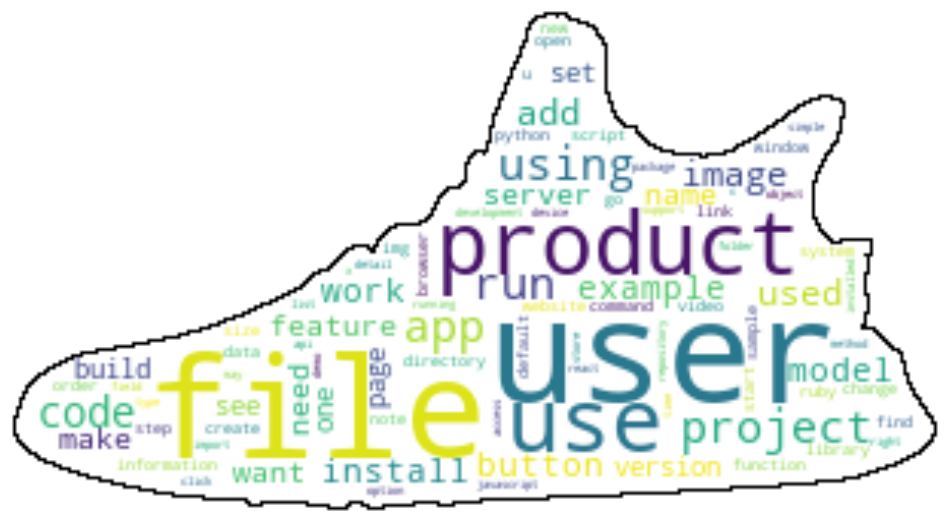

In [20]:
e.shoe_cloud(all_words)

In [21]:
transformed_python_mask = np.ndarray((python_mask.shape[0],python_mask.shape[1]), np.int32)

for i in range(len(python_mask)):
    transformed_python_mask[i] = list(map(transform_format, python_mask[i]))

NameError: name 'transform_format' is not defined

In [ ]:
wc = WordCloud(background_color="white", max_words=150, mask=transformed_python_mask, contour_width=.25, contour_color='black')

# Generate a wordcloud
wc.generate(' '.join(python_words))

# store to file
wc.to_file("python_mask.png")

# show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
javascript_mask = np.array(Image.open("javascript_mask.png"))
javascript_mask

In [ ]:
def transform_format1(val):
    if val == 1:
        return 255
    else:
        return val

In [ ]:
transformed_javascript_mask = np.ndarray((javascript_mask.shape[0],javascript_mask.shape[1]), np.int32)
javascript_mask
for i in range(len(javascript_mask)):
    transformed_javascript_mask[i] = list(map(transform_format1, javascript_mask[i]))

In [ ]:
wc = WordCloud(background_color="white", max_words=150, mask=transformed_javascript_mask, contour_width=.25, contour_color='black')

# Generate a wordcloud
wc.generate(' '.join(javascript_words))

# store to file
wc.to_file("javascript_mask.png")

# show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
dart_mask = np.array(Image.open("dart_mask.png"))
dart_mask

In [ ]:
def transform_format_dart(val):
    if val == 1:
        return 255
    else:
        return val

In [ ]:
transformed_dart_mask = np.ndarray((dart_mask.shape[0],dart_mask.shape[1]), np.int32)
dart_mask
for i in range(len(dart_mask)):
    transformed_dart_mask[i] = list(map(transform_format_dart, dart_mask[i]))

In [ ]:
wc = WordCloud(background_color="white", max_words=150, mask=transformed_dart_mask, contour_width=.25, contour_color='black')

# Generate a wordcloud
wc.generate(' '.join(dart_words))

# store to file
wc.to_file("dart_mask.png")

# show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
ruby_mask = np.array(Image.open("ruby_mask.png"))
ruby_mask

In [ ]:
def transform_format_ruby(val):
    if val == 1:
        return 255
    else:
        return val

In [ ]:
transformed_ruby_mask = np.ndarray((ruby_mask.shape[0],ruby_mask.shape[1]), np.int32)
ruby_mask
for i in range(len(ruby_mask)):
    transformed_ruby_mask[i] = list(map(transform_format_ruby, ruby_mask[i]))

In [ ]:
wc = WordCloud(background_color="white", max_words=150, mask=transformed_ruby_mask, contour_width=.25, contour_color='black')

# Generate a wordcloud
wc.generate(' '.join(ruby_words))

# store to file
wc.to_file("ruby_mask.png")

# show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
html_mask = np.array(Image.open("html_mask.png"))
html_mask

In [ ]:
def transform_format_html(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_html_mask = np.ndarray((html_mask.shape[0],html_mask.shape[1]), np.int32)
html_mask
for i in range(len(html_mask)):
    transformed_html_mask[i] = list(map(transform_format_html, html_mask[i]))

In [ ]:
wc = WordCloud(background_color="white", max_words=150, mask=transformed_html_mask, contour_width=.25, contour_color='black')

# Generate a wordcloud
wc.generate(' '.join(html_words))

# store to file
wc.to_file("html_mask.png")

# show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()